![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Pandas Introduction 
### with Stock Data and Correlation Examples


**Author list:** Ikhlaq Sidhu & Alexander Fred Ojala

**References / Sources:** 
Includes examples from Wes McKinney and the 10min intro to Pandas


**License Agreement:** Feel free to do whatever you want with this code

___

## What Does Pandas Do?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p1.jpg">

## What is a Pandas Table Object?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p2.jpg">


## This table is a dictionary of sequences (like np arrays)
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p3.jpg">


# Import packages

In [1]:
# import packages

import pandas as pd

# Extra packages
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting and styling

# jupyter notebook magic to display plots in output
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # make the plots bigger

# Part 1
### Simple creation and manipulation of Pandas objects
**Key Points:** Pandas has two / three main data types:
* Series (similar to numpy arrays, but with index)
* DataFrames (table or spreadsheet with Series in the columns)
* Panels (3D version of DataFrame, not as common)

### It is easy to create a DataFrame

### We use `pd.DataFrame(**inputs**)` and can insert almost any data type as an argument

**Function:** `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

Input data can be a numpy ndarray (structured or homogeneous), dict, or DataFrame. 
Dict can contain Series, arrays, constants, or list-like objects as the values.

In [2]:
# Try it with an array
np.random.seed(0) # set seed for reproducibility

a1 = np.array(np.random.randn(3))
a2 = np.array(np.random.randn(3))
a3 = np.array(np.random.randn(3))

print (a1)
print (a2)
print (a3)

[ 1.76405235  0.40015721  0.97873798]
[ 2.2408932   1.86755799 -0.97727788]
[ 0.95008842 -0.15135721 -0.10321885]


In [3]:
print(type(a1))

<class 'numpy.ndarray'>


In [4]:
# Create our first DataFrame w/ an np.array - it becomes a column
df0 = pd.DataFrame(a1)
print ("This is a", type(df0), ':')
df0

This is a <class 'pandas.core.frame.DataFrame'> :


,0
0,1.764052
1,0.400157
2,0.978738


In [5]:
print(df0) # difference when you print and output of the last row

          0
0  1.764052
1  0.400157
2  0.978738


In [6]:
# DataFrame from list of np.arrays

df0 = pd.DataFrame([a1, a2, a3])
df0

# notice that there is no column label, only integer values,
# and the index is set automatically

,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219


In [7]:
# DataFrame from 2D np.array

np.random.seed(0)

ax = np.array(np.random.randn(9)).reshape(3,3)
ax

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885]])

In [8]:
df0 = pd.DataFrame(ax,columns=['rand_normal_1','Random Again','Third'],
                   index=[100,200,99]) # we can also assign columns and indices, sizes have to match
df0

,rand_normal_1,Random Again,Third
100,1.764052,0.400157,0.978738
200,2.240893,1.867558,-0.977278
99,0.950088,-0.151357,-0.103219


In [9]:
# DataFrame from a Dictionary

dict1 = {'A':a1, 'B':a2}
df1 = pd.DataFrame(dict1) 
df1
# note that we now have columns without assignment

,A,B
0,1.764052,2.240893
1,0.400157,1.867558
2,0.978738,-0.977278


In [10]:
# We can easily add another column (just as you add values to a dictionary)
df1['C']=a3
df1

,A,B,C
0,1.764052,2.240893,0.950088
1,0.400157,1.867558,-0.151357
2,0.978738,-0.977278,-0.103219


In [11]:
# We can add a list with strings and ints as a column 
df1['L'] = ["Something", 3, "words"]
print ("The column L is a ",type (df1['L']))
df1

The column L is a  <class 'pandas.core.series.Series'>


,A,B,C,L
0,1.764052,2.240893,0.950088,Something
1,0.400157,1.867558,-0.151357,3
2,0.978738,-0.977278,-0.103219,words


In [12]:
print(df1['L'][0])
print(type(df1['L'][0]))
print(df1['L'][1])
print(type(df1['L'][1])) # datatype not upcasted / changed as in numpy

Something
<class 'str'>
3
<class 'int'>


# Pandas Series object
### Like an np.array, but we can combine data types and it has its own index
Note: Every column in a DataFrame is a Series

In [13]:
print(df1['L'])
print()
print(type(df1['L']))

0    Something
1            3
2        words
Name: L, dtype: object

<class 'pandas.core.series.Series'>


In [14]:
# Create a Series from a Python list
s = pd.Series([1,np.nan,3]) # automatic index, 0,1,2...
s2 = pd.Series([2, 3, 4], index = ['a','b','c']) #specific index
print (s)
print()
print (s2)

0    1.0
1    NaN
2    3.0
dtype: float64

a    2
b    3
c    4
dtype: int64


In [15]:
# We can add the Series s to the DataFrame above as column S
df1['S'] = s
df1

,A,B,C,L,S
0,1.764052,2.240893,0.950088,Something,1.0
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [16]:
# What happens if we use Series s2 
# which has a different index?
df1['S2']=s2
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,Something,1.0,NaN
1,0.400157,1.867558,-0.151357,3,NaN,NaN
2,0.978738,-0.977278,-0.103219,words,3.0,NaN


In [17]:
# possible fix
s2_new=s2.reset_index().drop('index',axis=1)
df1['S2'] = s2_new

# or
# s2.index = df1.index
# df1['S2'] = s2

# or
# df1['S2'] = list(s2) # because lists don't have any indices

In [18]:
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,Something,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [19]:
# But if we create a new dataframe with s2, 
# we can add the data but with the new index
df2 = pd.DataFrame(s2,columns=['S2'])
df2

,S2
a,2
b,3
c,4


In [20]:
df2['A']= a1
df2['B']=a2
df2['C']=a3
df2

,S2,A,B,C
a,2,1.764052,2.240893,0.950088
b,3,0.400157,1.867558,-0.151357
c,4,0.978738,-0.977278,-0.103219


In [21]:
# You can extract rows by position or label
print (df2[1:3]) # second and third row
print()
print (df2['a':'b']) # from a to b inclusive

   S2         A         B         C
b   3  0.400157  1.867558 -0.151357
c   4  0.978738 -0.977278 -0.103219

   S2         A         B         C
a   2  1.764052  2.240893  0.950088
b   3  0.400157  1.867558 -0.151357


In [22]:
# Back to df1
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,Something,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [23]:
# We can also rename columns
df1 = df1.rename(columns = {'L':'Renamed'})
df1

,A,B,C,Renamed,S,S2
0,1.764052,2.240893,0.950088,Something,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [24]:
# We can delete columns
del df1['S2']
df1

,A,B,C,Renamed,S
0,1.764052,2.240893,0.950088,Something,1.0
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [27]:
# or drop columns
df1.drop('A',axis=1, inplace=True) # does not change df1 if we don't set inplace=True

In [28]:
df1

,B,C,Renamed,S
0,2.240893,0.950088,Something,1.0
1,1.867558,-0.151357,3,NaN
2,-0.977278,-0.103219,words,3.0


In [29]:
# or drop rows
df1.drop(0)

,B,C,Renamed,S
1,1.867558,-0.151357,3,NaN
2,-0.977278,-0.103219,words,3.0


In [30]:
# Example: view only one column
df1['B']

0    2.240893
1    1.867558
2   -0.977278
Name: B, dtype: float64

In [31]:
# Or view several column
df1[['B','C']]

,B,C
0,2.240893,0.950088
1,1.867558,-0.151357
2,-0.977278,-0.103219


# Other ways of slicing
In the 10 min Pandas Guide, you will see many ways to view, slice a dataframe

* view/slice by rows, eg `df[1:3]`, etc.

* view by index location, see `df.iloc` (iloc)

* view by ranges of labels, ie index label 2 to 5, or dates feb 3 to feb 25, see `df.loc` (loc)
 
* view a single row by the index `df.xs` (xs) or `df.ix` (ix)

* filtering rows that have certain conditions
* add column
* add row

* How to change the index

and more...

In [32]:
print (df1[0:2])  # ok
# df1[1]  # not ok

          B         C    Renamed    S
0  2.240893  0.950088  Something  1.0
1  1.867558 -0.151357          3  NaN


In [33]:
df1.loc[0,['B','S']] # first row, three columns

B    2.24089
S          1
Name: 0, dtype: object

In [35]:
print (df1[0:2][0:1]) # slice of the DataFrame returned

          B         C    Renamed    S
0  2.240893  0.950088  Something  1.0


# Part 2
## Finance example: Large Data Frames

### Now, lets get some data in CSV format.

See https://www.quantshare.com/sa-43-10-ways-to-download-historical-stock-quotes-data-for-free


In [46]:
# We can download data from the web by using pd.read_csv
# A CSV file is a comma seperated file
# We can use this 'pd.read_csv' method with urls that host csv files

base_url = 'https://finance.google.com/finance/historical?output=csv&q='

dfg = pd.read_csv(base_url + 'googl') # Google stock data
dfa = pd.read_csv(base_url + 'aapl') # Apple stock data

In [47]:
dfg.head() # show first five values

,Date,Open,High,Low,Close,Volume
0,24-Jan-18,1184.98,1187.05,1167.40,1171.29,1856429
1,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520
3,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
4,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873


In [48]:
dfg.tail(3) # last three

,Date,Open,High,Low,Close,Volume
248,30-Jan-17,837.06,837.23,821.03,823.83,3516933
249,27-Jan-17,859.00,867.00,841.90,845.03,3752497
250,26-Jan-17,859.05,861.00,850.52,856.98,3493251


In [49]:
dfg.columns # returns columns, can be used to loop over

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [50]:
dfg.index # return

RangeIndex(start=0, stop=251, step=1)

# Convert the index to pandas datetime object

In [51]:
dfg['Date'][0]

'24-Jan-18'

In [52]:
type(dfg['Date'][0])

str

In [53]:
dfg.index = pd.to_datetime(dfg['Date']) # set index

In [54]:
#dfg.drop(['Date'],axis=1,inplace=True)

In [55]:
dfg.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29,1856429
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873


In [56]:
print(type(dfg.index[0]))
dfg.index[0]

<class 'pandas._libs.tslib.Timestamp'>


Timestamp('2018-01-24 00:00:00')

In [58]:
dfg.index

DatetimeIndex(['2018-01-24', '2018-01-23', '2018-01-22', '2018-01-19',
               '2018-01-18', '2018-01-17', '2018-01-16', '2018-01-12',
               '2018-01-11', '2018-01-10',
               ...
               '2017-02-08', '2017-02-07', '2017-02-06', '2017-02-03',
               '2017-02-02', '2017-02-01', '2017-01-31', '2017-01-30',
               '2017-01-27', '2017-01-26'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

# Attributes & general statitics of a Pandas DataFrame

In [59]:
dfg.shape # 249 business days last year

(251, 6)

In [60]:
dfg.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [61]:
dfg.size

1506

In [65]:
# Some general statistics

dfg.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,958.247649,964.304741,951.905259,958.707849,1.616900e+06
std,81.862519,83.046095,81.104724,82.356829,6.891981e+05
min,815.000000,822.390000,812.050000,815.240000,7.268980e+05
25%,890.695000,893.185000,886.165000,890.290000,1.191540e+06
50%,956.220000,960.990000,947.370000,955.240000,1.440982e+06
75%,1008.275000,1013.280000,1002.295000,1008.610000,1.797520e+06
max,1184.980000,1187.050000,1167.400000,1176.170000,5.933602e+06


In [67]:
# Boolean indexing
dfg['Open'][dfg['Open']>1130] # check what dates the opening

Date
2018-01-24    1184.98
2018-01-23    1170.62
2018-01-22    1143.82
2018-01-19    1138.03
2018-01-18    1139.35
2018-01-17    1136.36
2018-01-16    1140.31
Name: Open, dtype: float64

In [72]:
# Check where Open, High, Low and Close where greater than 1130
dfg[dfg>1000].drop('Volume',axis=1).head(3)

,Date,Open,High,Low,Close
Date,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16


In [74]:
# drop na
dfg[dfg>900].drop('Volume',axis=1).dropna()

,Date,Open,High,Low,Close
Date,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50
2018-01-18,18-Jan-18,1139.35,1140.58,1124.46,1135.97
2018-01-17,17-Jan-18,1136.36,1139.32,1123.49,1139.10
2018-01-16,16-Jan-18,1140.31,1148.88,1126.66,1130.70
2018-01-12,12-Jan-18,1110.10,1131.30,1108.01,1130.65
2018-01-11,11-Jan-18,1112.31,1114.85,1106.48,1112.05


In [75]:
# If you want the values in an np array
npg = dfg.values
print(type(npg))
print()
npg

<class 'numpy.ndarray'>



array([['24-Jan-18', 1184.98, 1187.05, 1167.4, 1171.29, 1856429],
       ['23-Jan-18', 1170.62, 1178.51, 1167.25, 1176.17, 1956865],
       ['22-Jan-18', 1143.82, 1166.88, 1141.82, 1164.16, 1477520],
       ..., 
       ['30-Jan-17', 837.06, 837.23, 821.03, 823.83, 3516933],
       ['27-Jan-17', 859.0, 867.0, 841.9, 845.03, 3752497],
       ['26-Jan-17', 859.05, 861.0, 850.52, 856.98, 3493251]], dtype=object)

### Selecting or Viewing Data within a DataFrame
Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix. (from 10 min guide to Pandas)


In [76]:
# Lets print the five first Close prices for Google
# This is a new Series (like a new table)
dfg['Close'][0:5]

Date
2018-01-24    1171.29
2018-01-23    1176.17
2018-01-22    1164.16
2018-01-19    1143.50
2018-01-18    1135.97
Name: Close, dtype: float64

In [77]:
# Lets print the 2 column, and top 3 values
dfg[['Close','High']][0:3]

,Close,High
Date,,
2018-01-24,1171.29,1187.05
2018-01-23,1176.17,1178.51
2018-01-22,1164.16,1166.88


In [78]:
# A slice: by rows (row numbers)
dfg[1:5] # 2nd to 5th element

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873


## .loc()

In [79]:
# Getting a cross section with .loc - BY VALUES of the index and columns
# df.loc[a:b, x:y], by rows and column location

# Note: You have to know indices and columns

dfg.loc['2017-08-31':'2017-08-21','Open':'Low']

,Open,High,Low
Date,,,
2017-08-31,946.30,957.20,946.25
2017-08-30,935.67,945.86,934.05
2017-08-29,919.95,938.19,919.31
2017-08-28,931.88,934.85,926.11
2017-08-25,939.21,940.73,930.10
2017-08-24,943.71,946.31,930.74
2017-08-23,937.00,945.42,935.24
2017-08-22,926.96,941.96,926.17
2017-08-21,925.77,928.25,918.60


## .iloc()

In [80]:
dfg.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [81]:
# .iloc slicing at specific location - BY POSITION in the table
# Recall:
# dfg[a:b] by rows
# dfg[[col]] or df[[col1, col2]] by columns
# df.loc[a:b, x:y], by index and column values + location
# df.iloc[3:5,0:2], numeric position in table

dfg.iloc[1:4,3:5] # 2nd to 4th row, 4th to 5th column

,Low,Close
Date,,
2018-01-23,1167.25,1176.17
2018-01-22,1141.82,1164.16
2018-01-19,1132.50,1143.50


In [82]:
# Data only from row with index value '3'
print (dfg.iloc[3])

Date      19-Jan-18
Open        1138.03
High        1143.78
Low          1132.5
Close        1143.5
Volume      1527554
Name: 2018-01-19 00:00:00, dtype: object


In [83]:
# iloc will accept a range with ':', just like numpy
dfg.iloc[1:3,:]

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520


In [84]:
# Can also return specific value
print (dfg.iloc[2,1])
# same as above but faster for one single scaler value
print (dfg.iat[2,1])

1143.82
1143.82


### More Basic Statistics

In [85]:
# A quick way to get statistics
dfg.describe()
# dfg.describe()['A'][1]
# dfg.describe()[2:3]

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,958.247649,964.304741,951.905259,958.707849,1.616900e+06
std,81.862519,83.046095,81.104724,82.356829,6.891981e+05
min,815.000000,822.390000,812.050000,815.240000,7.268980e+05
25%,890.695000,893.185000,886.165000,890.290000,1.191540e+06
50%,956.220000,960.990000,947.370000,955.240000,1.440982e+06
75%,1008.275000,1013.280000,1002.295000,1008.610000,1.797520e+06
max,1184.980000,1187.050000,1167.400000,1176.170000,5.933602e+06


In [86]:
dfg.describe().loc[['mean','std'],['High','Low']]

,High,Low
mean,964.304741,951.905259
std,83.046095,81.104724


In [87]:
dfg.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29,1856429
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554
2018-01-18,18-Jan-18,1139.35,1140.58,1124.46,1135.97,1374873


In [89]:
# We can change the index sorting
dfg.sort_index(axis=0, ascending=True).head() # starts a year ago

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-26,26-Jan-17,859.05,861.00,850.52,856.98,3493251
2017-01-27,27-Jan-17,859.00,867.00,841.90,845.03,3752497
2017-01-30,30-Jan-17,837.06,837.23,821.03,823.83,3516933
2017-01-31,31-Jan-17,819.50,823.07,813.40,820.19,2020180
2017-02-01,1-Feb-17,824.00,824.00,812.25,815.24,2251047


In [90]:
# sort by value
dfg.sort_values(by='Open')[0:10]

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-02-02,2-Feb-17,815.00,824.56,812.05,818.26,1689179
2017-01-31,31-Jan-17,819.50,823.07,813.40,820.19,2020180
2017-02-06,6-Feb-17,820.92,822.39,814.29,821.62,1350875
2017-02-03,3-Feb-17,823.13,826.13,819.35,820.13,1528095
2017-02-01,1-Feb-17,824.00,824.00,812.25,815.24,2251047
2017-02-07,7-Feb-17,825.50,831.92,823.29,829.23,1666605
2017-03-27,27-Mar-17,828.09,841.38,824.30,838.51,1935211
2017-02-08,8-Feb-17,830.53,834.25,825.11,829.88,1302225
2017-02-09,9-Feb-17,831.73,831.98,826.50,830.06,1194238


### Masks and Boolean Indexing

In [ ]:
dfg[0:10]

In [ ]:
# mask 1
mg1 = dfg['Open'][0:10]>1115
print (mg1)
# dfg.Open[0:10]>941    # same thing

In [ ]:
dfg['Open'][0:10][dfg['Open']>1115]
# shows only rows with opening price greater than 1115

In [ ]:
# mask 2 full data frame
mg2 = dfg[0:10]>1115
mg2

In [ ]:
dfg[dfg>1115].head(10)

In [ ]:
# we can also drop all NaN values
dfg[dfg>1115].head(10).dropna()

In [ ]:
# like Numpy, sometimes you need an actual copy, not a view or slice of the same data
dfg_same = dfg
dfg_same is dfg

In [ ]:
dfg2 = dfg.copy()
dfg2 is dfg

### Setting Values


In [91]:
# Recall
dfg.head(4)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29,1856429
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,1956865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,1477520
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50,1527554


In [92]:
# All the ways to view
# can also be used to set values
# good for data normalization

dfg['Volume'] = dfg['Volume']/100000.0
dfg.head(4)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,1184.98,1187.05,1167.40,1171.29,18.56429
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,19.56865
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,14.77520
2018-01-19,19-Jan-18,1138.03,1143.78,1132.50,1143.50,15.27554


In [93]:
dfg['Volume'] = 9999
print(dfg.head(10))

                 Date     Open     High      Low    Close  Volume
Date                                                             
2018-01-24  24-Jan-18  1184.98  1187.05  1167.40  1171.29    9999
2018-01-23  23-Jan-18  1170.62  1178.51  1167.25  1176.17    9999
2018-01-22  22-Jan-18  1143.82  1166.88  1141.82  1164.16    9999
2018-01-19  19-Jan-18  1138.03  1143.78  1132.50  1143.50    9999
2018-01-18  18-Jan-18  1139.35  1140.58  1124.46  1135.97    9999
2018-01-17  17-Jan-18  1136.36  1139.32  1123.49  1139.10    9999
2018-01-16  16-Jan-18  1140.31  1148.88  1126.66  1130.70    9999
2018-01-12  12-Jan-18  1110.10  1131.30  1108.01  1130.65    9999
2018-01-11  11-Jan-18  1112.31  1114.85  1106.48  1112.05    9999
2018-01-10  10-Jan-18  1107.00  1112.78  1103.98  1110.14    9999


In [94]:
# Change specific entry
dfg.iat[0,1] = 0
dfg.head(3)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,0.00,1187.05,1167.40,1171.29,9999
2018-01-23,23-Jan-18,1170.62,1178.51,1167.25,1176.17,9999
2018-01-22,22-Jan-18,1143.82,1166.88,1141.82,1164.16,9999


In [95]:
# Comments on dropping and filling NaN values
# A view where we drop any rows with value NnN
# dfg.dropna(how='any')  # this would be used to drop rows with Nan
# df1.fillna(value=5)    # this would be used to fill NaN values with 5

### More Statistics and Operations

In [96]:
# mean by column, also try var() for variance
dfg.mean()   

Open       953.526614
High       964.304741
Low        951.905259
Close      958.707849
Volume    9999.000000
dtype: float64

In [97]:
dfg[0:5].mean(axis = 1) # row means of first five rows

Date
2018-01-24    2704.948
2018-01-23    2938.310
2018-01-22    2923.136
2018-01-19    2911.362
2018-01-18    2907.872
dtype: float64

In [99]:
# Use the apply method to perform calculations on every element
dfg[0:10].apply(np.cumsum)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-24,24-Jan-18,0.00,1187.05,1167.40,1171.29,9999
2018-01-23,24-Jan-1823-Jan-18,1170.62,2365.56,2334.65,2347.46,19998
2018-01-22,24-Jan-1823-Jan-1822-Jan-18,2314.44,3532.44,3476.47,3511.62,29997
2018-01-19,24-Jan-1823-Jan-1822-Jan-1819-Jan-18,3452.47,4676.22,4608.97,4655.12,39996
2018-01-18,24-Jan-1823-Jan-1822-Jan-1819-Jan-1818-Jan-18,4591.82,5816.80,5733.43,5791.09,49995
2018-01-17,24-Jan-1823-Jan-1822-Jan-1819-Jan-1818-Jan-181...,5728.18,6956.12,6856.92,6930.19,59994
2018-01-16,24-Jan-1823-Jan-1822-Jan-1819-Jan-1818-Jan-181...,6868.49,8105.00,7983.58,8060.89,69993
2018-01-12,24-Jan-1823-Jan-1822-Jan-1819-Jan-1818-Jan-181...,7978.59,9236.30,9091.59,9191.54,79992
2018-01-11,24-Jan-1823-Jan-1822-Jan-1819-Jan-1818-Jan-181...,9090.90,10351.15,10198.07,10303.59,89991


# PlotCorrelation
### Load several stocks

In [100]:
# Reload
dfg = pd.read_csv(base_url + 'goog')
dfa = pd.read_csv(base_url + 'aapl')
dfm = pd.read_csv(base_url + 'msft')
dfn = pd.read_csv(base_url + 'nke')
dfb = pd.read_csv(base_url + 'ba')

In [101]:
print (dfb.head())

        Date    Open    High     Low   Close   Volume
0  24-Jan-18  336.20  338.99  334.14  334.69  4205351
1  23-Jan-18  338.34  338.94  334.81  335.59  4537784
2  22-Jan-18  335.29  341.38  332.04  338.00  6792870
3  19-Jan-18  341.67  344.00  335.75  337.73  7264401
4  18-Jan-18  350.70  350.83  339.15  340.16  9458634


In [102]:
# Rename columns
dfg = dfg.rename(columns = {'Close':'GOOG'})
#print (dfg.head())

dfa = dfa.rename(columns = {'Close':'AAPL'})
#print (dfa.head())

dfm = dfm.rename(columns = {'Close':'MSFT'})
#print (dfm.head())

dfn = dfn.rename(columns = {'Close':'NKE'})
#print (dfn.head())

dfb = dfb.rename(columns = {'Close':'BA'})

In [103]:
dfb.head(2)

,Date,Open,High,Low,BA,Volume
0,24-Jan-18,336.20,338.99,334.14,334.69,4205351
1,23-Jan-18,338.34,338.94,334.81,335.59,4537784


In [104]:
# Lets merge some tables
# They will all merge on the common column Date

df = dfg[['Date','GOOG']].merge(dfa[['Date','AAPL']])
df = df.merge(dfm[['Date','MSFT']])
df = df.merge(dfn[['Date','NKE']])
df = df.merge(dfb[['Date','BA']])

df.head()

,Date,GOOG,AAPL,MSFT,NKE,BA
0,24-Jan-18,1164.24,174.22,91.82,68.00,334.69
1,23-Jan-18,1169.97,177.04,91.90,67.14,335.59
2,22-Jan-18,1155.81,177.00,91.61,66.39,338.00
3,19-Jan-18,1137.51,178.46,90.00,67.21,337.73
4,18-Jan-18,1129.79,179.26,90.10,64.11,340.16


In [105]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,GOOG,AAPL,MSFT,NKE,BA
Date,,,,,
2018-01-24,1164.24,174.22,91.82,68.00,334.69
2018-01-23,1169.97,177.04,91.90,67.14,335.59
2018-01-22,1155.81,177.00,91.61,66.39,338.00
2018-01-19,1137.51,178.46,90.00,67.21,337.73
2018-01-18,1129.79,179.26,90.10,64.11,340.16


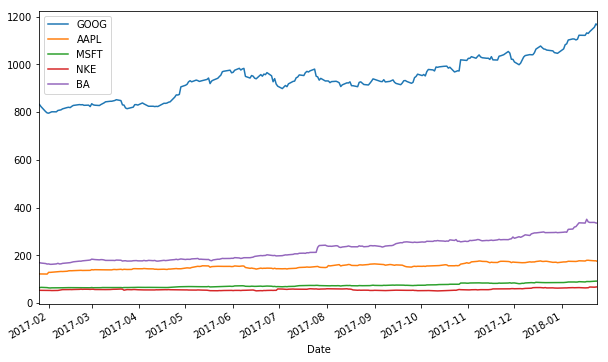

In [106]:
df.plot()

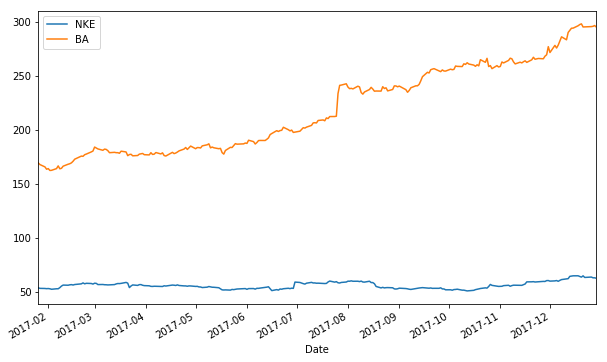

In [107]:
df['2017'][['NKE','BA']].plot()

In [108]:
# show a correlation matrix (pearson)
crl = df.corr()
crl

,GOOG,AAPL,MSFT,NKE,BA
GOOG,1.000000,0.903769,0.946871,0.506342,0.877275
AAPL,0.903769,1.000000,0.933398,0.494565,0.892778
MSFT,0.946871,0.933398,1.000000,0.572370,0.953693
NKE,0.506342,0.494565,0.572370,1.000000,0.569790
BA,0.877275,0.892778,0.953693,0.569790,1.000000


In [109]:
crl.sort_values(by='GOOG',ascending=False)

,GOOG,AAPL,MSFT,NKE,BA
GOOG,1.000000,0.903769,0.946871,0.506342,0.877275
MSFT,0.946871,0.933398,1.000000,0.572370,0.953693
AAPL,0.903769,1.000000,0.933398,0.494565,0.892778
BA,0.877275,0.892778,0.953693,0.569790,1.000000
NKE,0.506342,0.494565,0.572370,1.000000,0.569790


In [110]:
s = crl.unstack()
so = s.sort_values(ascending=False)
so[so<1]

MSFT  BA      0.953693
BA    MSFT    0.953693
GOOG  MSFT    0.946871
MSFT  GOOG    0.946871
      AAPL    0.933398
AAPL  MSFT    0.933398
      GOOG    0.903769
GOOG  AAPL    0.903769
AAPL  BA      0.892778
BA    AAPL    0.892778
GOOG  BA      0.877275
BA    GOOG    0.877275
MSFT  NKE     0.572370
NKE   MSFT    0.572370
BA    NKE     0.569790
NKE   BA      0.569790
      GOOG    0.506342
GOOG  NKE     0.506342
NKE   AAPL    0.494565
AAPL  NKE     0.494565
dtype: float64

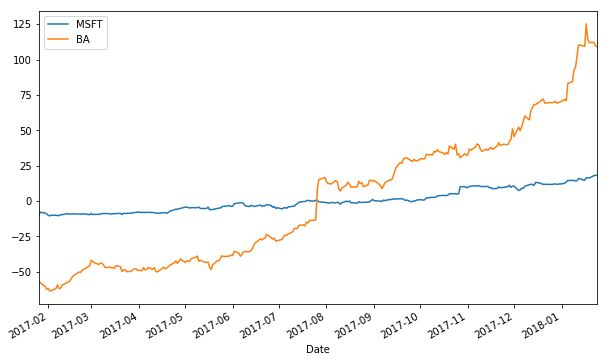

In [111]:
sim=df-df.mean()
sim[['MSFT','BA']].plot()